In [113]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")
df16 = pd.read_csv("0127.csv", encoding="utf-8")
df17 = pd.read_csv("0128.csv", encoding="utf-8")
df18 = pd.read_csv("0129.csv", encoding="utf-8")
df19 = pd.read_csv("0130.csv", encoding="utf-8")

In [114]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], axis=0, ignore_index = True)
df.shape

(56620, 2)

In [115]:
# 결측치 제거
df = df.dropna(axis = 0)
df.shape

(56008, 2)

In [116]:
# 데이터 중복 유무 확인
df['sentence'].nunique(), df['score'].nunique()

# 중복 제거
df.drop_duplicates(subset=['sentence'], inplace=True)
print('총 샘플 수 :',len(df))

총 샘플 수 : 54955


In [126]:
def rating_to_label(score):
    if score >= 7:
        return 1
    if score <= 6:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [127]:
df = df.dropna(axis=0).reset_index(inplace=False, drop=True) 
df.shape

(54955, 3)

In [128]:
df["y"].value_counts()

1    39999
0    14956
Name: y, dtype: int64

<AxesSubplot:>

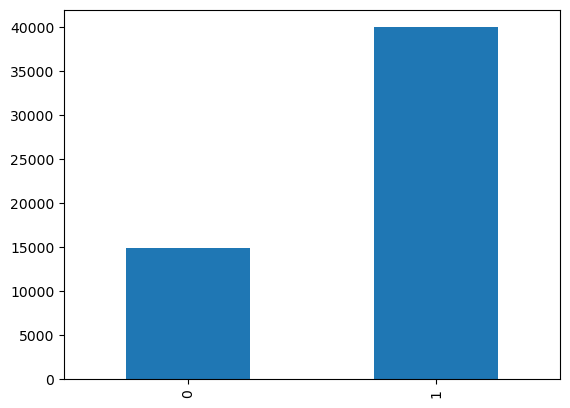

In [129]:
df['y'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [25]:
# 패키지 설치
import pandas as pd
#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')

# Train 데이터 불러오기
train_df = df

# 데이터 확인
print(train_df.head())

                                            sentence  score  y
0                      연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움      9  1
1                                  큐브가 훨씬 재미있었던 것 같다      4  0
2  나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...      8  1
3                            넷플로시청하기에 10점~배우분들 매력 최고     10  1
4                                        이걸 영화라고....      1  0


In [130]:
text = train_df['sentence']
score = train_df['y']

In [131]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(text, score , test_size=0.2, random_state=0)
print(len(train_x), len(train_y), len(test_x), len(test_y))

38023 38023 9506 9506


In [132]:
train_data = pd.concat([train_x, train_y], axis=1).reset_index(inplace=False, drop=True) 

In [133]:
test_data = pd.concat([test_x, test_y], axis=1).reset_index(inplace=False, drop=True) 

In [134]:
print(train_data.groupby('y').size().reset_index(name = 'count'))

   y  count
0  0   8227
1  1  29796


In [135]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [136]:
train_data['sentence'] = train_data['sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['sentence'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

sentence    1
y           0
dtype: int64


In [137]:
train_data.loc[train_data.sentence.isnull()].head()

,sentence,y
276,NaN,1


In [138]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

38022


In [139]:
test_data.drop_duplicates(subset = ['sentence'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['sentence'] = test_data['sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['sentence'] = test_data['sentence'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['sentence'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 9485


In [140]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [141]:
okt = Okt()

X_train = []
for sentence in tqdm(train_data['sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 38022/38022 [02:03<00:00, 306.76it/s]


In [142]:
print(X_train[:3])

[['5분', '만에', '잠', '옴', '...'], ['생각', '거', '보다', '별로', '이다'], ['유해진', '...', '진지하다', '보고', '있다', '웃음', '빵', '역시', '대', '배우', '이다']]


In [143]:
X_test = []
for sentence in tqdm(test_data['sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 9485/9485 [00:32<00:00, 295.16it/s]


In [144]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [145]:
print(tokenizer.word_index)

{'.': 1, '보다': 2, '영화': 3, '을': 4, '..': 5, '너무': 6, '좋다': 7, ',': 8, '있다': 9, '이다': 10, '재밌다': 11, '...': 12, '없다': 13, '연기': 14, '감동': 15, '되다': 16, '같다': 17, '배우': 18, '적': 19, '다': 20, '로': 21, '스토리': 22, '진짜': 23, '에서': 24, '않다': 25, '!': 26, '만': 27, '생각': 28, '것': 29, '?': 30, '그': 31, '나오다': 32, '아니다': 33, '안': 34, '자다': 35, '정말': 36, '더': 37, '가다': 38, '최고': 39, '만들다': 40, '수': 41, '보고': 42, '연출': 43, '고': 44, '나': 45, '인': 46, '사람': 47, '님': 48, '재미있다': 49, '게': 50, '평점': 51, '들다': 52, '때': 53, '왜': 54, '~': 55, '내': 56, '하고': 57, '볼': 58, '그냥': 59, '모르다': 60, '요': 61, '꼭': 62, '까지': 63, '감독': 64, '시간': 65, '싶다': 66, '눈물': 67, '못': 68, '오다': 69, '다시': 70, '말': 71, '장면': 72, '점': 73, '내용': 74, '!!': 75, '마지막': 76, ';': 77, '이렇다': 78, '정도': 79, '2': 80, '많다': 81, '액션': 82, '슬램덩크': 83, '아쉽다': 84, '느낌': 85, 'ㅠㅠ': 86, '그렇다': 87, '기대': 88, '작품': 89, '저': 90, '알다': 91, 'amp': 92, '처음': 93, '중': 94, '1': 95, '하나': 96, '드라마': 97, '거': 98, '많이': 99, '번': 100, '재미': 101, '느끼다': 102, '또'

In [147]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 22626
등장 빈도가 2번 이하인 희귀 단어의 수: 13028
단어 집합에서 희귀 단어의 비율: 57.57977547953682
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.394532248110897


In [148]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9599


In [149]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [150]:
print(X_train[:3])

[[1540, 706, 878, 1493, 12], [28, 98, 2, 247, 10], [840, 12, 1276, 42, 9, 502, 2678, 158, 171, 18, 10]]


In [151]:
y_train = np.array(train_data['y'])
y_test = np.array(test_data['y'])

In [152]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [153]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

37992
37992


리뷰의 최대 길이 : 368
리뷰의 평균 길이 : 17.19330385344283


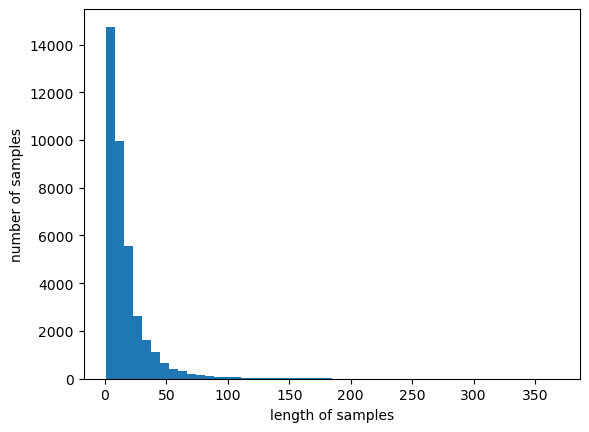

In [154]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [155]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [156]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 95.24373552326806


In [157]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [158]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
475/475 [==============================] - ETA: 0s - loss: 0.3431 - acc: 0.8560
Epoch 1: val_acc improved from -inf to 0.89564, saving model to best_model.h5
475/475 [==============================] - 30s 60ms/step - loss: 0.3431 - acc: 0.8560 - val_loss: 0.2577 - val_acc: 0.8956
Epoch 2/15
475/475 [==============================] - ETA: 0s - loss: 0.2345 - acc: 0.9077
Epoch 2: val_acc improved from 0.89564 to 0.90262, saving model to best_model.h5
475/475 [==============================] - 28s 59ms/step - loss: 0.2345 - acc: 0.9077 - val_loss: 0.2390 - val_acc: 0.9026
Epoch 3/15
475/475 [==============================] - ETA: 0s - loss: 0.2057 - acc: 0.9213
Epoch 3: val_acc did not improve from 0.90262
475/475 [==============================] - 28s 59ms/step - loss: 0.2057 - acc: 0.9213 - val_loss: 0.2434 - val_acc: 0.9024
Epoch 4/15
475/475 [==============================] - ETA: 0s - loss: 0.1911 - acc: 0.9279
Epoch 4: val_acc did not improve from 0.90262
475/475 [=======

In [159]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

297/297 [==============================] - 4s 10ms/step - loss: 0.2459 - acc: 0.9052

 테스트 정확도: 0.9052


In [160]:
with open('tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [167]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    
sentiment_predict(input('감성분석할 문장을 입력해 주세요.: '))

감성분석할 문장을 입력해 주세요.:  간단하게 볼 만 했습니다


1/1 [==============================] - 0s 90ms/step
87.86% 확률로 긍정 리뷰입니다.

